# Exploratory data analysis

In [2]:
from datetime import time
import calendar

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from utils import load_dataset

In [3]:
%matplotlib inline

In [4]:
# Set default Seaborn style
sns.set()

In [5]:
df = load_dataset()

In [6]:
df.head()

,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
Fecha-I,,,,,,,,,,,,,,,,,
2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## Distributions

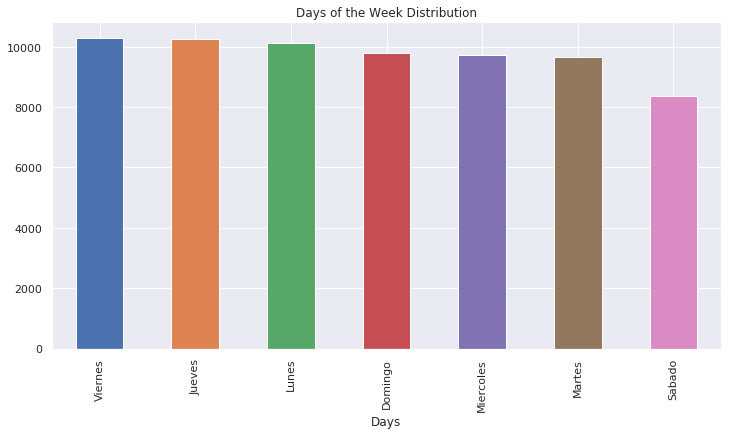

In [7]:
_ = plt.figure(figsize=(12,6))
_ = df['DIANOM'].value_counts().plot(kind='bar')
_ = plt.xlabel('Days')
_ = plt.title('Days of the Week Distribution')

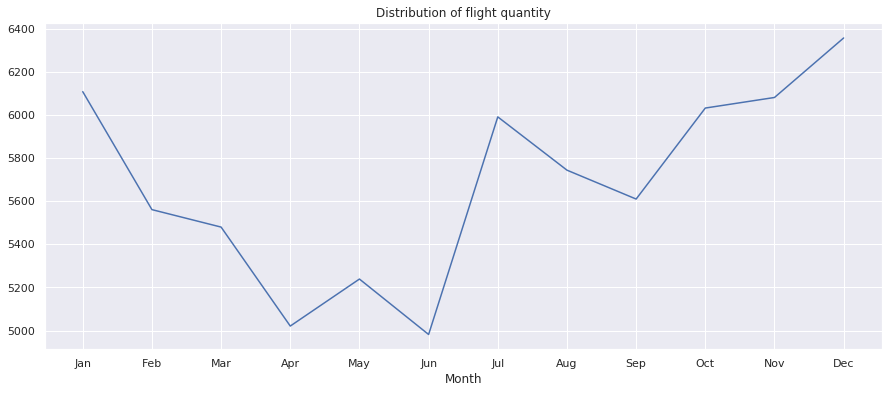

In [8]:
month_dist = df.groupby(df.index.month).count()['DIA']
month_names = [calendar.month_abbr[i] for i in month_dist.index]
_ = plt.figure(figsize=(15, 6))
_ = plt.plot(month_dist)
_ = plt.title('Distribution of flight quantity')
_ = plt.xlabel('Month')
_ = plt.xticks(month_dist.index, month_names)

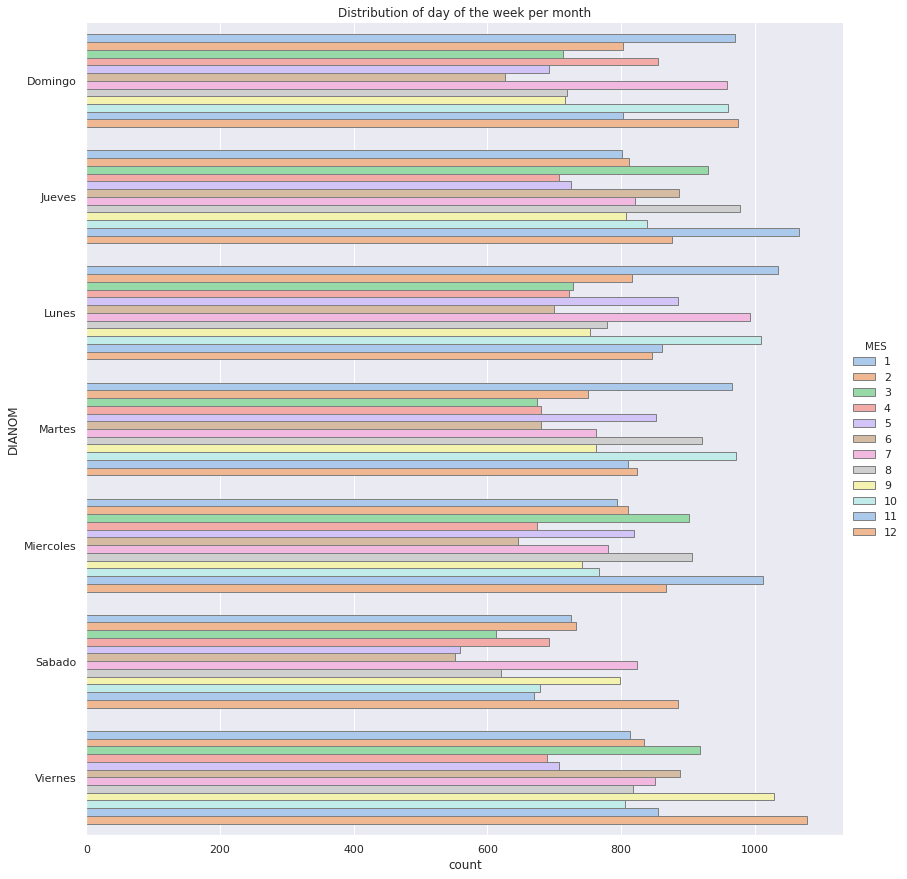

In [8]:
_ = sns.catplot(y="DIANOM", 
                hue="MES",
                kind="count", 
                palette="pastel", 
                edgecolor=".5", 
                height=12,
                data=df)
_ = plt.title('Distribution of day of the week per month')

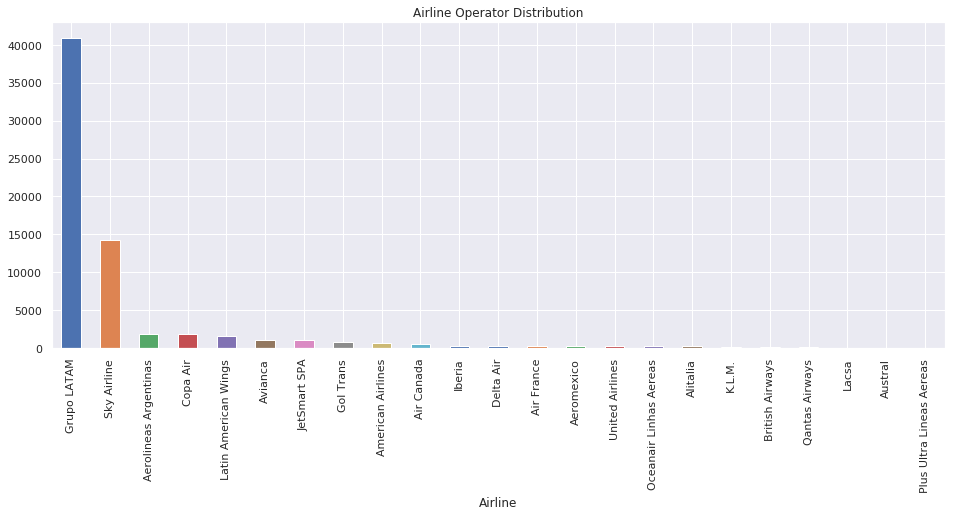

In [9]:
_ = plt.figure(figsize=(16,6))
_ = df['OPERA'].value_counts().plot(kind='bar')
_ = plt.xlabel('Airline')
_ = plt.title('Airline Operator Distribution')

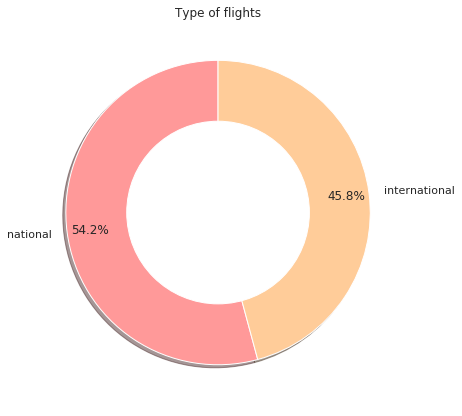

In [10]:
type_fligth = df['TIPOVUELO'].value_counts()
type_fligth.index = ['national', 'international']
colors = ['#ff9999','#ffcc99']
_ = plt.figure(figsize=(7,7))
_ = plt.pie(type_fligth, 
            labels=type_fligth.index, 
            autopct='%1.1f%%', 
            shadow=True,
            colors=colors,
            pctdistance=0.85, 
            startangle=90)
_ = plt.title('Type of flights')
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
_ = fig.gca().add_artist(centre_circle)